# A. Generate Random Data with Some Rules

In [1]:
import pandas as pd
import random
import numpy as np
pd.set_option('display.max_rows', 10)
data = pd.read_csv("sidoarjo.csv", delimiter = ";")
data

,tahun,provinsi,kabupaten,kecamatan,kelurahan
0,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO
1,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDUNGBOCOK
2,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SINGOGALIH
3,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,TARIK
4,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MERGOBENER
...,...,...,...,...,...
344,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,PENAMBANGAN
345,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WARUBERON
346,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BOGEMPINGGIR
347,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEDUNGSUKODANI


In [2]:
suara_1 = 373_673
suara_2 = 387_688
suara_3 = 212_977
golput = 4_257

total_tps_tarik = 112
total_tps_jprambon = 139
total_tps_krembung = 125
total_tps_porong = 124
total_tps_jabon = 99
total_tps_tanggulangin = 152
total_tps_candi = 261
total_tps_tulangan = 175
total_tps_wonoayu = 145
total_tps_sukodono = 208
total_tps_sidoarjo = 361
total_tps_buduran = 167
total_tps_sedati = 165
total_tps_waru = 363
total_tps_gedangan = 207
total_tps_taman = 365
total_tps_krian = 221
total_tps_balongbendo = 132
data

,tahun,provinsi,kabupaten,kecamatan,kelurahan
0,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO
1,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,KEDUNGBOCOK
2,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,SINGOGALIH
3,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,TARIK
4,2020,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MERGOBENER
...,...,...,...,...,...
344,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,PENAMBANGAN
345,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,WARUBERON
346,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BOGEMPINGGIR
347,2020,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEDUNGSUKODANI


In [3]:
data = data.drop(columns = ["tahun"])
kab_adm_sidoarjo = data[data["kabupaten"] == "SIDOARJO"]
kec_adm_tarik = data[data["kecamatan"] == "TARIK"]
kec_adm_prambon = data[data["kecamatan"] == "PRAMBON"]
kec_adm_krembung = data[data["kecamatan"] == "KREMBUNG"]
kec_adm_porong = data[data["kecamatan"] == "PORONG"]
kec_adm_jabon = data[data["kecamatan"] == "JABON"]
kec_adm_tanggulangin = data[data["kecamatan"] == "TANGGULANGIN"]
kec_adm_candi = data[data["kecamatan"] == "CANDI"]
kec_adm_tulangan = data[data["kecamatan"] == "TULANGAN"]
kec_adm_wonoayu = data[data["kecamatan"] == "WONOAYU"]
kec_adm_sukodono = data[data["kecamatan"] == "SUKODONO"]
kec_adm_sidoarjo = data[data["kecamatan"] == "SIDOARJO"]
kec_adm_buduran = data[data["kecamatan"] == "BUDURAN"]
kec_adm_sedati = data[data["kecamatan"] == "SEDATI"]
kec_adm_waru = data[data["kecamatan"] == "WARU"]
kec_adm_gedangan = data[data["kecamatan"] == "GEDANGAN"]
kec_adm_krian = data[data["kecamatan"] == "KRIAN"]
kec_adm_balongbendo = data[data["kecamatan"] == "BALONGBENDO"]

In [4]:
def generate_tps(data, suara_1, suara_2, suara_3, golput):
  kelurahan = data["kelurahan"].unique()
  kelurahan_tps = []
  for kel in kelurahan:
    kelurahan_tps.append({
      "kelurahan": kel,
      "jml_tps": random.randint(4, 7)
    })

  tps = []

  for kel in kelurahan_tps:
    for i in range(kel["jml_tps"]):
      tps.append({
          "kelurahan": kel["kelurahan"],
          "no_tps": i + 1,
          "suara_1": 0,
          "suara_2": 0,
          "suara_3": 0,
          "golput": 0
      })

  random_suara_1 = (np.random.dirichlet(np.ones(len(tps)),size = 1)[0] * suara_1).tolist()
  random_suara_2 = (np.random.dirichlet(np.ones(len(tps)),size = 1)[0] * suara_2).tolist()
  random_suara_3 = (np.random.dirichlet(np.ones(len(tps)),size = 1)[0] * suara_3).tolist()
  random_golput = (np.random.dirichlet(np.ones(len(tps)),size = 1)[0] * golput).tolist()

  random_suara_1 = [round(i) for i in random_suara_1]
  random_suara_2 = [round(i) for i in random_suara_2]
  random_suara_3 = [round(i) for i in random_suara_3]
  random_golput = [round(i) for i in random_golput]

  for i in range(len(tps)):
    tps[i]["suara_1"] = random_suara_1[i]
    tps[i]["suara_2"] = random_suara_2[i]
    tps[i]["suara_3"] = random_suara_3[i]
    tps[i]["golput"] = random_golput[i]
  
  tps.append({
    "kelurahan": "TOTAL",
    "no_tps": sum([kel["jml_tps"] for kel in kelurahan_tps]),
    "suara_1": sum([t["suara_1"] for t in tps]),
    "suara_2": sum([t["suara_2"] for t in tps]),
    "suara_3": sum([t["suara_3"] for t in tps]),
    "golput": sum([t["golput"] for t in tps])
  })

  return pd.DataFrame(tps)

In [5]:
generate = generate_tps(data, suara_1, suara_2, suara_3, golput)
generate

total_row = pd.DataFrame([{
  "provinsi": "TOTAL",
  "kabupaten": len(data["kabupaten"].unique()),
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data["kelurahan"].unique()),
  "no_tps": len(generate["kelurahan"].unique()) * len(generate["no_tps"].unique()),
  "suara_1": generate["suara_1"].sum(),
  "suara_2": generate["suara_2"].sum(),
  "suara_3": generate["suara_3"].sum(),
  "golput": generate["golput"].sum()
}])

completed_data= pd.merge(data, generate, on = "kelurahan", how = "outer")
completed_data

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,1,509,297,52,3
1,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,2,140,474,53,1
2,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,3,52,900,10,2
3,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,4,70,123,175,2
4,PROVINSI JAWA TIMUR,SIDOARJO,TARIK,MLIRIPROWO,5,919,9,337,2
...,...,...,...,...,...,...,...,...,...
1914,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,3,65,27,2,6
1915,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,4,56,228,17,1
1916,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,5,254,69,115,2
1917,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,6,289,75,164,0


# B. Pengambilan Random Sampling data Kabupaten

In [6]:
# Data TPS beserta suara di Kab Sidoarjo
suara_1 = 373673
suara_2 = 387688
suara_3 = 212977
golput = 4257
data_suara_kab = generate_tps(kab_adm_sidoarjo, suara_1, suara_2, suara_3, golput)
data_suara_kab

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,429,42,155,3
1,MLIRIPROWO,2,499,147,476,3
2,MLIRIPROWO,3,40,512,7,2
3,MLIRIPROWO,4,24,470,10,1
4,MLIRIPROWO,5,89,338,29,3
...,...,...,...,...,...,...
1842,BAKUNGTEMENGGUNGAN,4,97,79,141,0
1843,BAKUNGTEMENGGUNGAN,5,167,96,18,5
1844,BAKUNGTEMENGGUNGAN,6,362,77,22,3
1845,BAKUNGTEMENGGUNGAN,7,15,341,54,1


In [7]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_kab])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kab = pd.merge(data, data_suara, on = "kelurahan", how = "outer")
completed_data_kab = pd.concat([completed_data_kab, total_row], ignore_index = True)

# C. Pengambilan Random Sampling data Kecamatan

In [8]:
# Data TPS beserta suara di Kec Tarik
suara_1 = 20409
suara_2 = 7850
suara_3 = 10789
golput = 203
data_suara_tarik = generate_tps(kec_adm_tarik, suara_1, suara_2, suara_3, golput)
data_suara_tarik

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,62,51,35,1
1,MLIRIPROWO,2,105,107,125,1
2,MLIRIPROWO,3,1184,163,22,1
3,MLIRIPROWO,4,516,26,61,4
4,MLIRIPROWO,5,140,9,19,1
...,...,...,...,...,...,...
111,KEDINDING,3,5,3,5,0
112,KEDINDING,4,15,175,232,2
113,KEDINDING,5,255,42,134,0
114,KEDINDING,6,265,134,29,1


In [9]:
# Data TPS beserta suara di Kec Prambon
suara_1 = 14442
suara_2 = 18059
suara_3 = 11328
golput = 186
data_suara_prambon = generate_tps(kec_adm_prambon, suara_1, suara_2, suara_3, golput)
data_suara_prambon

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PRAMBON,1,92,105,41,0
1,PRAMBON,2,52,362,111,2
2,PRAMBON,3,141,87,129,0
3,PRAMBON,4,255,66,66,1
4,KAJARTENGGULI,1,111,34,52,1
...,...,...,...,...,...,...
100,WATUTULIS,2,39,247,124,3
101,WATUTULIS,3,56,802,53,2
102,WATUTULIS,4,142,151,18,1
103,WATUTULIS,5,214,45,18,2


In [10]:
# Data TPS beserta suara di Kec Krembung
suara_1 = 14118
suara_2 = 18025
suara_3 = 8905
golput = 163
data_suara_krembung = generate_tps(kec_adm_krembung, suara_1, suara_2, suara_3, golput)
data_suara_krembung

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,TAMBAKREJO,1,91,13,94,1
1,TAMBAKREJO,2,32,140,24,0
2,TAMBAKREJO,3,200,247,58,0
3,TAMBAKREJO,4,100,237,60,0
4,TAMBAKREJO,5,17,31,8,0
...,...,...,...,...,...,...
93,BALONGGARUT,1,97,180,3,0
94,BALONGGARUT,2,22,371,79,3
95,BALONGGARUT,3,22,183,211,2
96,BALONGGARUT,4,711,136,148,2


In [11]:
# Data TPS beserta suara di Kec Porong
suara_1 = 12708
suara_2 = 14267
suara_3 = 8909
golput = 187
data_suara_porong = generate_tps(kec_adm_porong, suara_1, suara_2, suara_3, golput)
data_suara_porong

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PORONG,1,130,237,26,5
1,PORONG,2,70,20,10,3
2,PORONG,3,213,241,36,1
3,PORONG,4,13,38,49,10
4,PORONG,5,179,102,26,0
...,...,...,...,...,...,...
80,PESAWAHAN,1,11,166,142,3
81,PESAWAHAN,2,104,196,123,3
82,PESAWAHAN,3,14,165,7,2
83,PESAWAHAN,4,2,37,171,1


In [12]:
# Data TPS beserta suara di Kec Jabon
suara_1 = 13805
suara_2 = 12243
suara_3 = 5720
golput = 176
data_suara_jabon = generate_tps(kec_adm_jabon, suara_1, suara_2, suara_3, golput)
data_suara_jabon

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PANGGREH,1,38,128,32,1
1,PANGGREH,2,166,109,14,4
2,PANGGREH,3,419,16,26,1
3,PANGGREH,4,956,82,212,1
4,PANGGREH,5,22,105,16,0
...,...,...,...,...,...,...
81,PERMISAN,4,9,100,17,6
82,PERMISAN,5,179,279,69,6
83,PERMISAN,6,20,166,36,0
84,PERMISAN,7,183,33,12,1


In [13]:
# Data TPS beserta suara di Kec Tulangan
suara_1 = 16367
suara_2 = 28600
suara_3 = 10589
golput = 243
data_suara_tulangan = generate_tps(kec_adm_tulangan, suara_1, suara_2, suara_3, golput)
data_suara_tulangan

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,JANTI,1,51,37,80,2
1,JANTI,2,76,33,124,1
2,JANTI,3,91,147,94,1
3,JANTI,4,107,272,126,6
4,JANTI,5,43,88,122,1
...,...,...,...,...,...,...
122,GRABAGAN,2,5,29,6,1
123,GRABAGAN,3,30,105,160,1
124,GRABAGAN,4,57,605,17,2
125,GRABAGAN,5,169,40,237,4


In [14]:
# Data TPS beserta suara di Kec Candi
suara_1 = 29845
suara_2 = 31612
suara_3 = 13356
golput = 265
data_suara_candi = generate_tps(kec_adm_candi, suara_1, suara_2, suara_3, golput)
data_suara_candi

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KARANGTANJUNG,1,103,106,62,1
1,KARANGTANJUNG,2,409,42,151,4
2,KARANGTANJUNG,3,46,212,123,1
3,KARANGTANJUNG,4,129,21,110,1
4,KARANGTANJUNG,5,2,122,285,2
...,...,...,...,...,...,...
126,LARANGAN,1,113,197,41,0
127,LARANGAN,2,523,527,0,3
128,LARANGAN,3,16,97,33,0
129,LARANGAN,4,132,284,21,0


In [15]:
# Data TPS beserta suara di Kec Tanggulangin
suara_1 = 17873
suara_2 = 15280
suara_3 = 13643
golput = 221
data_suara_tanggulangin = generate_tps(kec_adm_tanggulangin, suara_1, suara_2, suara_3, golput)
data_suara_tanggulangin

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KALISAMPURNO,1,223,60,42,6
1,KALISAMPURNO,2,115,289,113,4
2,KALISAMPURNO,3,182,196,158,0
3,KALISAMPURNO,4,45,21,9,1
4,KETAPANG,1,173,61,477,0
...,...,...,...,...,...,...
97,RANDEGAN,4,49,186,90,1
98,RANDEGAN,5,121,274,58,2
99,RANDEGAN,6,113,10,6,1
100,RANDEGAN,7,440,68,172,2


In [16]:
# Data TPS beserta suara di Kec Sidoarjo
suara_1 = 35724
suara_2 = 29583
suara_3 = 19840
golput = 241
data_suara_sidoarjo = generate_tps(kec_adm_sidoarjo, suara_1, suara_2, suara_3, golput)
data_suara_sidoarjo

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,SIDOKARE,1,10,107,29,0
1,SIDOKARE,2,118,147,134,2
2,SIDOKARE,3,749,129,120,0
3,SIDOKARE,4,18,143,486,1
4,SIDOKARE,5,203,181,25,1
...,...,...,...,...,...,...
133,SUMPUT,3,233,94,38,5
134,SUMPUT,4,652,99,275,2
135,SUMPUT,5,74,162,187,0
136,SUMPUT,6,689,384,111,4


In [17]:
# Data TPS beserta suara di Kec Wonoayu
suara_1 = 20029
suara_2 = 16277
suara_3 = 9504
golput = 187
data_suara_wonoayu = generate_tps(kec_adm_wonoayu, suara_1, suara_2, suara_3, golput)
data_suara_wonoayu

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,TANGGUL,1,102,48,45,3
1,TANGGUL,2,79,92,22,1
2,TANGGUL,3,114,17,76,3
3,TANGGUL,4,13,302,33,1
4,SIMOKETAWANG,1,0,17,142,0
...,...,...,...,...,...,...
119,CANDINEGORO,4,100,111,9,1
120,CANDINEGORO,5,192,2,19,2
121,CANDINEGORO,6,136,173,70,0
122,CANDINEGORO,7,331,274,50,1


In [18]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_tarik, data_suara_prambon, data_suara_krembung, data_suara_porong, data_suara_jabon, 
                        data_suara_tulangan, data_suara_candi, data_suara_tanggulangin, data_suara_sidoarjo, data_suara_wonoayu])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kec = pd.merge(data, data_suara, on = "kelurahan", how = "outer")
completed_data_kec = pd.concat([completed_data_kec, total_row], ignore_index = True)

# D. Menghitung estimasi parameter dan selisih proporsi dengan parameter menggunakan metode 2 stage metode random sampling 

In [19]:
# estimasi parameter
estimation_parameter_data = []

for i in range(1, 20):  
  random_sampling = completed_data_kec.sample(frac = i / 20, random_state = 42).reset_index(drop = True)

  # sum all suara_1, suara_2, suata 3, and golput
  suara_1 = random_sampling["suara_1"].sum()
  suara_2 = random_sampling["suara_2"].sum()
  suara_3 = random_sampling["suara_3"].sum()
  golput = random_sampling["golput"].sum()

  # calculate percentage of suara_1, suara_2, suara 3, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i / 20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,36.899225,41.355595,21.395349,0.349831
1,10,36.679439,40.485915,22.468314,0.366331
2,15,35.318751,42.169458,22.109286,0.402504
3,20,35.961774,40.659330,22.986137,0.392759
4,25,36.582737,40.628631,22.355225,0.433407
...,...,...,...,...,...
14,75,38.467046,39.012227,22.101262,0.419465
15,80,38.861947,38.517355,22.205495,0.415203
16,85,39.009507,38.236512,22.341025,0.412956
17,90,38.882637,38.201328,22.502753,0.413283


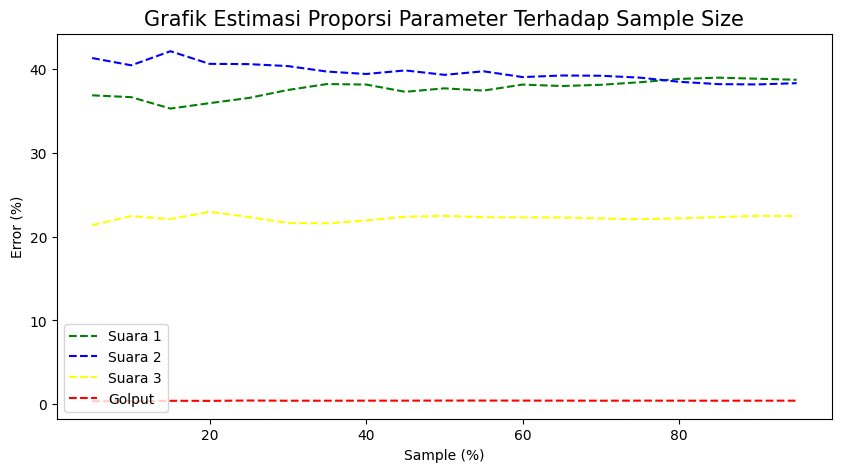

In [20]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize = (10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label = "Suara 1", color = "green", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label = "Suara 2", color = "blue", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label = "Suara 3", color = "yellow", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["golput"], label = "Golput", color = "red", linestyle = "dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size = 15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [21]:
kab = (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())
kec = (completed_data_kec["suara_1"].sum() + completed_data_kec["suara_2"].sum() + completed_data_kec["suara_3"].sum() + completed_data_kec["golput"].sum())

perbandingan = kab/kec
print(perbandingan)

1.918674531242507


In [22]:
# hitung eror estimasi parameter suara_1, suara_2, suara 3, dan golput 
percentage_suara_1_kabupaten = (completed_data_kec["suara_1"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data_kec["suara_2"].sum() * perbandingan  / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_suara_3_kabupaten = (completed_data_kec["suara_3"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data_kec["golput"].sum() * perbandingan / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100 * (estimation_parameter_data["suara_1"] - percentage_suara_1_kabupaten) / percentage_suara_1_kabupaten)
error_suara_2 = abs(100 * (estimation_parameter_data["suara_2"] - percentage_suara_2_kabupaten) / percentage_suara_2_kabupaten)
error_suara_3 = abs(100 * (estimation_parameter_data["suara_3"] - percentage_suara_3_kabupaten) / percentage_suara_3_kabupaten)
error_golput = abs(100 * (estimation_parameter_data["golput"] - percentage_golput_kabupaten) / percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})
data_error.to_csv('output_2MRS.csv', index = False)

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,4.792719,8.129133,5.259191,15.449388
1,10,5.359809,5.855251,0.507988,11.461465
2,15,8.870653,10.257076,2.097803,2.718756
3,20,7.211527,6.308665,1.784982,5.074082
4,25,5.609319,6.228398,1.008759,4.750002
...,...,...,...,...,...
14,75,0.747432,2.002118,2.133334,1.380468
15,80,0.271491,0.708216,1.671780,0.350395
16,85,0.652227,0.026082,1.071640,0.192721
17,90,0.324875,0.118076,0.355492,0.113696


<Figure size 1000x500 with 0 Axes>

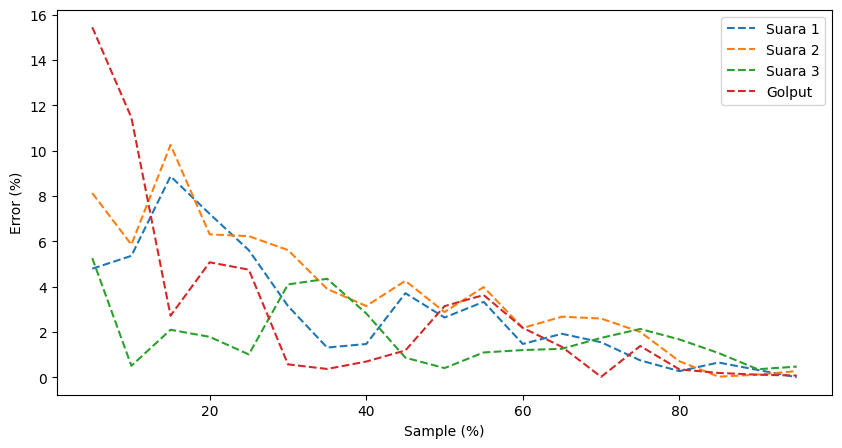

In [23]:
# display estimation persentase error of proportion
fig = plt.figure(figsize = (10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize = (10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label = "Suara 1", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label = "Suara 2", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label = "Suara 3", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label = "Golput", linestyle = "dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# E. Pengambilan Random Sampling data Kelurahan

In [24]:
kel_adm_mliriprowo = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "MLIRIPROWO"]
kel_adm_kedungbocok = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "KEDUNGBOCOK"]
kel_adm_singogalih = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "SINGOGALIH"]
kel_adm_margosari = kec_adm_tarik[kec_adm_tarik["kelurahan"] == "MERGOSARI"]
kel_adm_prambon = kec_adm_prambon[kec_adm_prambon["kelurahan"] == "PRAMBON"]
kel_adm_kajartengguli = kec_adm_prambon[kec_adm_prambon["kelurahan"] == "KAJARTENGGULI"]
kel_adm_gedangrowo = kec_adm_prambon[kec_adm_prambon["kelurahan"] == "GEDANGROWO"]
kel_adm_karangtanjung = kec_adm_candi[kec_adm_candi["kelurahan"] == "KARANGTANJUNG"]
kel_adm_sidokare = kec_adm_sidoarjo[kec_adm_sidoarjo["kelurahan"] == "SIDOKARE"]
kel_adm_celep = kec_adm_sidoarjo[kec_adm_sidoarjo["kelurahan"] == "CELEP"]
kel_adm_kalisampurno = kec_adm_tanggulangin[kec_adm_tanggulangin["kelurahan"] == "KALISAMPURNO"]
kel_adm_kalitengah = kec_adm_tanggulangin[kec_adm_tanggulangin["kelurahan"] == "KALITENGAH"]
kel_adm_tanggul = kec_adm_wonoayu[kec_adm_wonoayu["kelurahan"] == "TANGGUL"]
kel_adm_pilang = kec_adm_wonoayu[kec_adm_wonoayu["kelurahan"] == "PILANG"]
kel_adm_wonokasian = kec_adm_wonoayu[kec_adm_wonoayu["kelurahan"] == "WONOKASIAN"]

In [25]:
# Data TPS beserta suara di Kec Mliriprowo
suara_1 = 1022
suara_2 = 299
suara_3 = 761
golput = 12
data_suara_mliriprowo = generate_tps(kel_adm_mliriprowo, suara_1, suara_2, suara_3, golput)
data_suara_mliriprowo

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MLIRIPROWO,1,150,14,136,0
1,MLIRIPROWO,2,239,122,262,2
2,MLIRIPROWO,3,19,41,1,0
3,MLIRIPROWO,4,257,100,28,3
4,MLIRIPROWO,5,38,1,277,3
5,MLIRIPROWO,6,320,22,58,3
6,TOTAL,6,1023,300,762,11


In [26]:
# Data TPS beserta suara di Kec kedungbocok
suara_1 = 626
suara_2 = 484
suara_3 = 939
golput = 10
data_suara_kedungbocok = generate_tps(kel_adm_kedungbocok, suara_1, suara_2, suara_3, golput)
data_suara_kedungbocok

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KEDUNGBOCOK,1,151,76,31,6
1,KEDUNGBOCOK,2,51,121,375,3
2,KEDUNGBOCOK,3,198,125,531,0
3,KEDUNGBOCOK,4,227,162,2,1
4,TOTAL,4,627,484,939,10


In [27]:
# Data TPS beserta suara di Kec Singogalih
suara_1 = 1007
suara_2 = 1202
suara_3 = 587
golput = 9
data_suara_singogalih = generate_tps(kel_adm_singogalih, suara_1, suara_2, suara_3, golput)
data_suara_singogalih

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,SINGOGALIH,1,118,61,323,3
1,SINGOGALIH,2,218,274,63,1
2,SINGOGALIH,3,370,278,81,2
3,SINGOGALIH,4,214,198,29,2
4,SINGOGALIH,5,63,173,80,1
5,SINGOGALIH,6,25,217,11,0
6,TOTAL,6,1008,1201,587,9


In [28]:
# Data TPS beserta suara di Kel Margosari
suara_1 = 956
suara_2 = 583
suara_3 = 457
golput = 13
data_suara_margosari = generate_tps(kel_adm_margosari, suara_1, suara_2, suara_3, golput)
data_suara_margosari

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,MERGOSARI,1,113,93,133,1
1,MERGOSARI,2,34,179,0,4
2,MERGOSARI,3,45,174,143,3
3,MERGOSARI,4,641,84,39,1
4,MERGOSARI,5,123,53,142,4
5,TOTAL,5,956,583,457,13


In [29]:
# Data TPS beserta suara di Kel Prambon
suara_1 = 305
suara_2 = 1256
suara_3 = 623
golput = 14
data_suara_prambon = generate_tps(kel_adm_prambon, suara_1, suara_2, suara_3, golput)
data_suara_prambon

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PRAMBON,1,32,179,162,4
1,PRAMBON,2,51,308,98,3
2,PRAMBON,3,18,405,40,2
3,PRAMBON,4,5,184,14,1
4,PRAMBON,5,200,181,308,4
5,TOTAL,5,306,1257,622,14


In [30]:
# Data TPS beserta suara di Kel Kajartengguli
suara_1 = 726
suara_2 = 579
suara_3 = 294
golput = 18
data_suara_kajartengguli = generate_tps(kel_adm_kajartengguli, suara_1, suara_2, suara_3, golput)
data_suara_kajartengguli

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KAJARTENGGULI,1,46,359,46,5
1,KAJARTENGGULI,2,267,23,103,2
2,KAJARTENGGULI,3,33,45,97,4
3,KAJARTENGGULI,4,54,106,17,1
4,KAJARTENGGULI,5,274,1,10,4
5,KAJARTENGGULI,6,53,45,22,2
6,TOTAL,6,727,579,295,18


In [31]:
# Data TPS beserta suara di Kel Gedangworo
suara_1 = 539
suara_2 = 704
suara_3 = 643
golput = 12
data_suara_gedangrowo = generate_tps(kel_adm_gedangrowo, suara_1, suara_2, suara_3, golput)
data_suara_gedangrowo

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,GEDANGROWO,1,111,33,15,7
1,GEDANGROWO,2,25,133,316,1
2,GEDANGROWO,3,133,513,74,3
3,GEDANGROWO,4,270,26,239,1
4,TOTAL,4,539,705,644,12


In [32]:
# Data TPS beserta suara di Kel Karangtanjung
suara_1 = 1043
suara_2 = 1821
suara_3 = 708
golput = 17
data_suara_karangtanjung = generate_tps(kel_adm_karangtanjung, suara_1, suara_2, suara_3, golput)
data_suara_karangtanjung

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KARANGTANJUNG,1,71,926,0,1
1,KARANGTANJUNG,2,83,59,92,0
2,KARANGTANJUNG,3,437,275,99,5
3,KARANGTANJUNG,4,69,306,206,2
4,KARANGTANJUNG,5,182,144,47,3
5,KARANGTANJUNG,6,202,111,264,5
6,TOTAL,6,1044,1821,708,16


In [33]:
# Data TPS beserta suara di Kel Sidokare
suara_1 = 2580
suara_2 = 1702
suara_3 = 1659
golput = 19
data_suara_sidokare = generate_tps(kel_adm_sidokare, suara_1, suara_2, suara_3, golput)
data_suara_sidokare

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,SIDOKARE,1,331,88,314,8
1,SIDOKARE,2,142,446,163,0
2,SIDOKARE,3,529,118,29,4
3,SIDOKARE,4,92,351,533,0
4,SIDOKARE,5,369,282,500,4
5,SIDOKARE,6,767,197,45,1
6,SIDOKARE,7,350,219,75,2
7,TOTAL,7,2580,1701,1659,19


In [34]:
# Data TPS beserta suara di Kel Celep
suara_1 = 1252
suara_2 = 1084
suara_3 = 429
golput = 14
data_suara_celep = generate_tps(kel_adm_celep, suara_1, suara_2, suara_3, golput)
data_suara_celep

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,CELEP,1,80,371,19,3
1,CELEP,2,117,277,12,3
2,CELEP,3,93,78,127,1
3,CELEP,4,19,49,81,2
4,CELEP,5,37,2,14,1
5,CELEP,6,906,306,176,4
6,TOTAL,6,1252,1083,429,14


In [35]:
# Data TPS beserta suara di Kel Kalisampurno
suara_1 = 1192
suara_2 = 2162
suara_3 = 568
golput = 18
data_suara_kalisampurno = generate_tps(kel_adm_kalisampurno, suara_1, suara_2, suara_3, golput)
data_suara_kalisampurno

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KALISAMPURNO,1,70,130,140,0
1,KALISAMPURNO,2,65,673,59,6
2,KALISAMPURNO,3,120,729,7,2
3,KALISAMPURNO,4,936,630,362,10
4,TOTAL,4,1191,2162,568,18


In [36]:
# Data TPS beserta suara di Kel Kalitenggah
suara_1 = 3119
suara_2 = 1248
suara_3 = 1518
golput = 20
data_suara_kalitengah = generate_tps(kel_adm_kalitengah, suara_1, suara_2, suara_3, golput)
data_suara_kalitengah

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,KALITENGAH,1,42,51,173,4
1,KALITENGAH,2,5,143,440,7
2,KALITENGAH,3,790,254,330,1
3,KALITENGAH,4,91,249,25,0
4,KALITENGAH,5,1358,136,342,1
5,KALITENGAH,6,833,415,208,7
6,TOTAL,6,3119,1248,1518,20


In [37]:
# Data TPS beserta suara di Kel Tanggul
suara_1 = 1051
suara_2 = 816
suara_3 = 582
golput = 16
data_suara_tanggul = generate_tps(kel_adm_tanggul, suara_1, suara_2, suara_3, golput)
data_suara_tanggul

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,TANGGUL,1,386,108,156,0
1,TANGGUL,2,314,3,189,3
2,TANGGUL,3,192,59,50,4
3,TANGGUL,4,26,497,79,2
4,TANGGUL,5,133,148,108,7
5,TOTAL,5,1051,815,582,16


In [38]:
# Data TPS beserta suara di Kel Pilang
suara_1 = 1280
suara_2 = 1191
suara_3 = 473
golput = 13
data_suara_pilang = generate_tps(kel_adm_pilang, suara_1, suara_2, suara_3, golput)
data_suara_pilang

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PILANG,1,92,123,55,7
1,PILANG,2,99,737,96,2
2,PILANG,3,872,150,70,0
3,PILANG,4,183,19,85,0
4,PILANG,5,14,73,105,0
5,PILANG,6,20,89,62,4
6,TOTAL,6,1280,1191,473,13


In [39]:
# Data TPS beserta suara di Kel wonokasian
suara_1 = 1663
suara_2 = 1109
suara_3 = 503
golput = 15
data_suara_wonokasian = generate_tps(kel_adm_wonokasian, suara_1, suara_2, suara_3, golput)
data_suara_wonokasian

,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,WONOKASIAN,1,35,12,56,3
1,WONOKASIAN,2,731,203,147,0
2,WONOKASIAN,3,115,123,149,0
3,WONOKASIAN,4,534,233,34,5
4,WONOKASIAN,5,228,428,27,1
5,WONOKASIAN,6,20,111,89,6
6,TOTAL,6,1663,1110,502,15


In [40]:
# collect all data suara and remove total row from every data
data_suara = pd.concat([data_suara_mliriprowo, data_suara_margosari, data_suara_singogalih, data_suara_kedungbocok,
                        data_suara_prambon, data_suara_kajartengguli, data_suara_gedangrowo, data_suara_karangtanjung,
                        data_suara_sidokare, data_suara_celep, data_suara_kalisampurno, data_suara_kalitengah, 
                        data_suara_tanggul, data_suara_pilang, data_suara_wonokasian])
data_suara = data_suara[data_suara["kelurahan"] != "TOTAL"]

total_row = pd.DataFrame([{
  "kabupaten": "TOTAL",
  "kecamatan": len(data["kecamatan"].unique()),
  "kelurahan": len(data_suara["kelurahan"].unique()),
  "no_tps": len(data_suara["kelurahan"].unique()) * len(data_suara["no_tps"].unique()),
  "suara_1": data_suara["suara_1"].sum(),
  "suara_2": data_suara["suara_2"].sum(),
  "suara_3": data_suara["suara_3"].sum(),
  "golput": data_suara["golput"].sum()
}])

# concat data suara with data 
completed_data_kel = pd.merge(data, data_suara, on = "kelurahan", how = "outer")
completed_data_kel = pd.concat([completed_data_kel, total_row], ignore_index = True)

# F. Menghitung estimasi parameter dan selisih proporsi dengan parameter menggunakan metode 3 stage metode random sampling

In [41]:
# estimasi parameter
estimation_parameter_data = []

for i in range(1, 20):  
  random_sampling = completed_data_kec.sample(frac = i / 20, random_state = 42).reset_index(drop = True)

  # sum all suara_1, suara_2, suara3, and golput
  suara_1 = random_sampling["suara_1"].sum()
  suara_2 = random_sampling["suara_2"].sum()
  suara_3 = random_sampling["suara_3"].sum()
  golput = random_sampling["golput"].sum()

  # calculate percentage of suara_1, suara_2, suara 3, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i / 20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,36.899225,41.355595,21.395349,0.349831
1,10,36.679439,40.485915,22.468314,0.366331
2,15,35.318751,42.169458,22.109286,0.402504
3,20,35.961774,40.659330,22.986137,0.392759
4,25,36.582737,40.628631,22.355225,0.433407
...,...,...,...,...,...
14,75,38.467046,39.012227,22.101262,0.419465
15,80,38.861947,38.517355,22.205495,0.415203
16,85,39.009507,38.236512,22.341025,0.412956
17,90,38.882637,38.201328,22.502753,0.413283


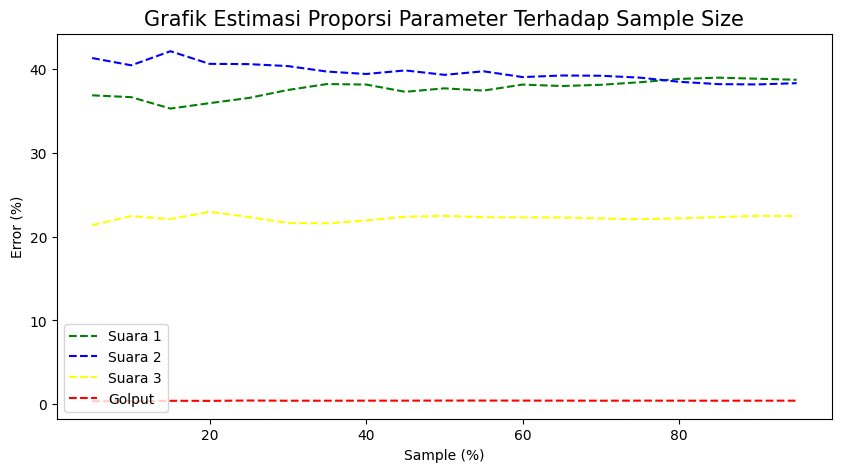

In [42]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize = (10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label = "Suara 1", color = "green", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label = "Suara 2", color = "blue", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label = "Suara 3", color = "yellow", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["golput"], label = "Golput", color = "red", linestyle = "dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size = 15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [43]:
kel = (completed_data_kel["suara_1"].sum() + completed_data_kel["suara_2"].sum() + completed_data_kel["suara_3"].sum() + completed_data_kel["golput"].sum())

perbandingan2 = kab / kel
print(perbandingan2)

21.95029515679519


In [44]:
# hitung eror estimasi parameter suara_1, suara_2, suara 3, dan golput 
percentage_suara_1_kabupaten = (completed_data_kel["suara_1"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data_kel["suara_2"].sum() * perbandingan2  / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_suara_3_kabupaten = (completed_data_kel["suara_3"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data_kel["golput"].sum() * perbandingan2 / (completed_data_kab["suara_1"].sum() + completed_data_kab["suara_2"].sum() + completed_data_kab["suara_3"].sum() + completed_data_kab["golput"].sum())) * 100 

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100 * (estimation_parameter_data["suara_1"] - percentage_suara_1_kabupaten) / percentage_suara_1_kabupaten)
error_suara_2 = abs(100 * (estimation_parameter_data["suara_2"] - percentage_suara_2_kabupaten) / percentage_suara_2_kabupaten)
error_suara_3 = abs(100 * (estimation_parameter_data["suara_3"] - percentage_suara_3_kabupaten) / percentage_suara_3_kabupaten)
error_golput = abs(100 * (estimation_parameter_data["golput"] - percentage_golput_kabupaten) / percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

data_error.to_csv('output_3MRS.csv', index = False)

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,8.447088,16.042680,9.263411,26.874078
1,10,8.992412,13.602381,4.713018,23.425013
2,15,12.368498,18.326358,6.235639,15.863641
3,20,10.773055,14.088978,2.516960,17.900709
4,25,9.232345,14.002837,5.192623,9.404080
...,...,...,...,...,...
14,75,4.557073,9.467253,6.269668,12.318314
15,80,3.577259,8.078654,5.827622,13.209202
16,85,3.211138,7.290616,5.252847,13.678930
17,90,3.525924,7.191890,4.566967,13.610583


<Figure size 1000x500 with 0 Axes>

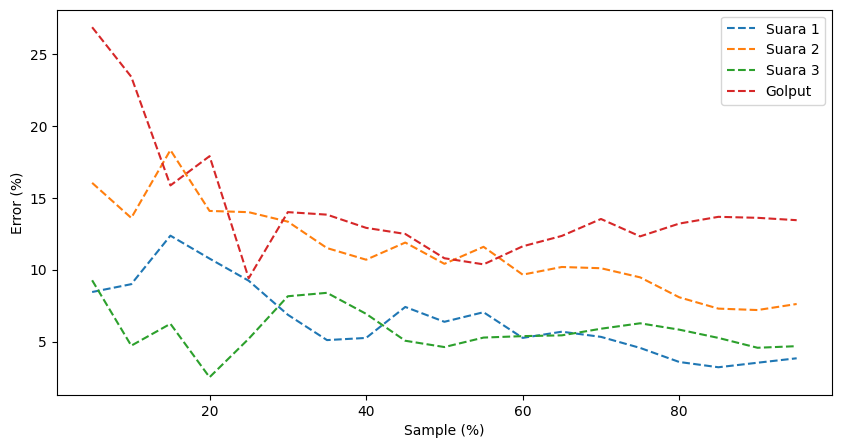

In [45]:
# display estimation persentase error of proportion
fig = plt.figure(figsize = (10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize = (10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label = "Suara 1", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label = "Suara 2", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label = "Suara 3", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label = "Golput", linestyle = "dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# G. Menghitung estimasi parameter dengan cluster random sampling

In [46]:
# make cluster sampling from completed_data
cluster_sampling = completed_data.groupby(["provinsi", "kabupaten", "kecamatan"]).apply(lambda x: x.sample(frac = .1, replace = False))
cluster_sampling = cluster_sampling.reset_index(drop = True)
cluster_sampling

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,SEKETI,2,25,542,10,4
1,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEMANGSEN,7,100,237,19,3
2,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BAKUNGTEMENGGUNGAN,2,18,214,17,7
3,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,BALONGBENDO,1,31,242,108,3
4,PROVINSI JAWA TIMUR,SIDOARJO,BALONGBENDO,KEDUNGSUKODANI,1,10,103,17,3
...,...,...,...,...,...,...,...,...,...
186,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,PILANG,6,6,742,52,8
187,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,MOJORANGAGUNG,3,105,193,388,2
188,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,KARANGPURI,5,26,49,280,1
189,PROVINSI JAWA TIMUR,SIDOARJO,WONOAYU,SIMOANGIN-ANGIN,3,353,492,116,1


In [47]:
# estimasi parameter
estimation_parameter_data = []
estimasi_suara_1 = []
estimasi_suara_2 = []
estimasi_suara_3 = []
estimasi_golput = []

for i in range(1, 20):
  cluster_sampling = completed_data.groupby(["provinsi", "kabupaten", "kecamatan"]).apply(lambda x: x.sample(frac = i / 20, replace = False))

  # sum all suara_1, suara_2, suara 3, and golput
  suara_1 = cluster_sampling["suara_1"].sum()
  suara_2 = cluster_sampling["suara_2"].sum()
  suara_3 = cluster_sampling["suara_3"].sum()
  golput = cluster_sampling["golput"].sum()

  # append to list
  estimasi_suara_1.append(suara_1)
  estimasi_suara_2.append(suara_2)
  estimasi_suara_3.append(suara_3)
  estimasi_golput.append(golput)

  # calculate percentage of suara_1, suara_2, suara 3, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i / 20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,42.907567,34.420312,22.210858,0.461264
1,10,35.434364,40.944832,23.185019,0.435785
2,15,38.367293,40.883289,20.337304,0.412114
3,20,37.734566,40.265188,21.535428,0.464818
4,25,37.458328,39.985089,22.145178,0.411405
...,...,...,...,...,...
14,75,37.831835,39.820232,21.919952,0.427981
15,80,38.136823,39.700254,21.739258,0.423665
16,85,38.451404,39.009492,22.107352,0.431752
17,90,38.123027,39.535608,21.916043,0.425321


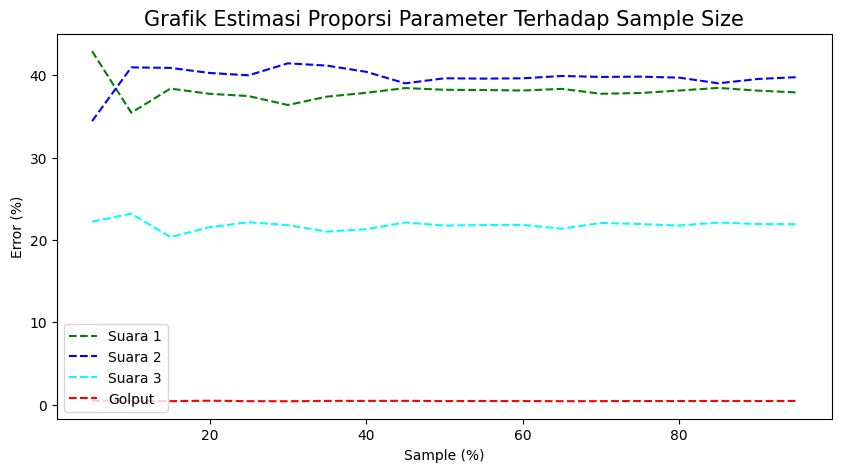

In [48]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label = "Suara 1", color = "green", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label = "Suara 2", color = "blue", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label = "Suara 3", color = "cyan", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["golput"], label = "Golput", color = "red", linestyle = "dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size = 15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [49]:
# hitung eror estimasi parameter suara_1, suara_2, suara 3, dan golput 
percentage_suara_1_kabupaten = (completed_data["suara_1"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data["suara_2"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_3_kabupaten = (completed_data["suara_3"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data["golput"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100 * (estimation_parameter_data["suara_1"] - percentage_suara_1_kabupaten) / percentage_suara_1_kabupaten)
error_suara_2 = abs(100 * (estimation_parameter_data["suara_2"] - percentage_suara_2_kabupaten) / percentage_suara_2_kabupaten)
error_suara_3 = abs(100 * (estimation_parameter_data["suara_3"] - percentage_suara_3_kabupaten) / percentage_suara_3_kabupaten)
error_golput = abs(100 * (estimation_parameter_data["golput"] - percentage_golput_kabupaten) / percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
    "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

data_error.to_csv('output_CRS.csv', index = False)

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,12.380341,13.050967,1.872208,7.296485
1,10,7.192922,3.430602,6.340292,1.369716
2,15,0.488792,3.275139,6.721026,4.136454
3,20,1.168402,1.713755,1.225714,8.123283
4,25,1.891903,1.006198,1.570960,4.301391
...,...,...,...,...,...
14,75,0.913641,0.589755,0.537940,0.445679
15,80,0.114839,0.286678,0.290831,1.449469
16,85,0.709088,1.458254,1.397469,0.431673
17,90,0.150972,0.129233,0.520014,1.064309


<Figure size 1000x500 with 0 Axes>

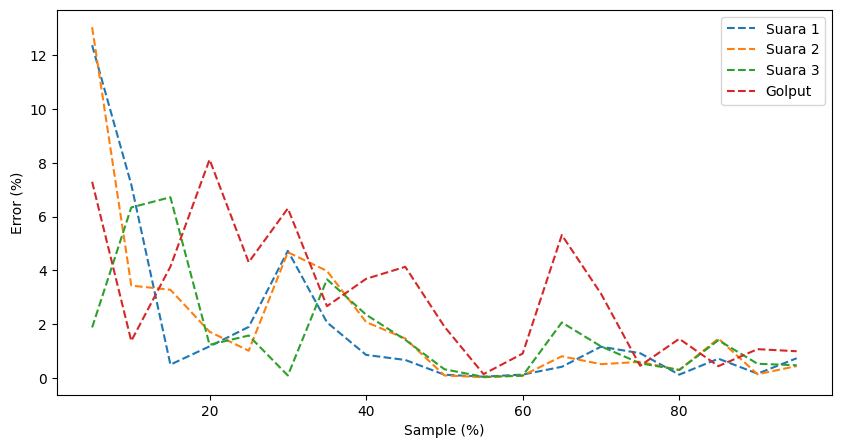

In [50]:
# display estimation persentase error of proportion
fig = plt.figure(figsize = (10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize = (10, 5))
plt.plot(x, estimation_parameter_data["error_suara_1"], label = "Suara 1", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["error_suara_2"], label = "Suara 2", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["error_suara_3"], label = "Suara 3", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["error_golput"], label = "Golput", linestyle = "dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

# H. Menghitung estimasi parameter dengan multistage  cluster random sampling

In [51]:
# get 3 random kecamatan from each kabupaten_kota as make it to list, except for KEP SERIBU, take all kecamatan in that city
completed_data = completed_data[completed_data["provinsi"] != "TOTAL"]

# get random kelurahan from completed_data as make it to list
kelurahan_list = np.random.choice(completed_data["kelurahan"].unique(), 50, replace = False)

# take only 3 random tps from each kelurahan as dataframe from completed_data
tps = []
for kel in kelurahan_list:
  tps.append(completed_data[completed_data["kelurahan"] == kel].sample(n = 2, replace = False))

# concat all tps to one dataframe
cluster_sampling = pd.concat(tps).reset_index(drop = True)
cluster_sampling

,provinsi,kabupaten,kecamatan,kelurahan,no_tps,suara_1,suara_2,suara_3,golput
0,PROVINSI JAWA TIMUR,SIDOARJO,KRIAN,TERUNGKULON,5,78,364,55,1
1,PROVINSI JAWA TIMUR,SIDOARJO,KRIAN,TERUNGKULON,4,148,311,37,1
2,PROVINSI JAWA TIMUR,SIDOARJO,SIDOARJO,PEKAUMAN,6,178,111,50,11
3,PROVINSI JAWA TIMUR,SIDOARJO,SIDOARJO,PEKAUMAN,2,442,83,165,1
4,PROVINSI JAWA TIMUR,SIDOARJO,CANDI,KARANGTANJUNG,3,54,48,68,2
...,...,...,...,...,...,...,...,...,...
95,PROVINSI JAWA TIMUR,SIDOARJO,SIDOARJO,GEBANG,4,112,76,10,4
96,PROVINSI JAWA TIMUR,SIDOARJO,PRAMBON,BULANG,1,423,48,18,1
97,PROVINSI JAWA TIMUR,SIDOARJO,PRAMBON,BULANG,5,42,66,35,5
98,PROVINSI JAWA TIMUR,SIDOARJO,KREMBUNG,BALONGGARUT,2,296,434,6,1


In [52]:
# estimasi parameter
estimation_parameter_data = []
estimasi_suara_1 = []
estimasi_suara_2 = []
estimasi_suara_3 = []
estimasi_golput = []

for i in range(1, 20):  
  multistage_sampling = completed_data.sample(frac = i / 20, random_state = 42).reset_index(drop = True)

  # sum all suara_1, suara_2, suara 3, and golput
  suara_1 = multistage_sampling["suara_1"].sum()
  suara_2 = multistage_sampling["suara_2"].sum()
  suara_3 = multistage_sampling["suara_3"].sum()
  golput = multistage_sampling["golput"].sum()

  # append to list
  estimasi_suara_1.append(suara_1)
  estimasi_suara_2.append(suara_2)
  estimasi_golput.append(golput)

  # calculate percentage of suara_1, suara_2, suara 3, and golput
  percentage_suara_1 = (suara_1 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_2 = (suara_2 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_suara_3 = (suara_3 / (suara_1 + suara_2 + suara_3 + golput)) * 100
  percentage_golput = (golput / (suara_1 + suara_2 + suara_3 + golput)) * 100

  estimation_parameter_data.append({
    "Sample (%)": int(i / 20 * 100),
    "suara_1": percentage_suara_1,
    "suara_2": percentage_suara_2,
    "suara_3": percentage_suara_3,
    "golput": percentage_golput,
  })

# make estimation parameter data to dataframe
estimation_parameter_data = pd.DataFrame(estimation_parameter_data)

print("================== Estimasi Proporsi Parameter ==================")
estimation_parameter_data

================== Estimasi Proporsi Parameter ==================


,Sample (%),suara_1,suara_2,suara_3,golput
0,5,38.755346,39.754461,21.071745,0.418449
1,10,38.116715,37.799966,23.663509,0.419811
2,15,38.599789,37.852844,23.129847,0.417520
3,20,40.611741,36.603947,22.354804,0.429508
4,25,39.013390,38.433320,22.129087,0.424202
...,...,...,...,...,...
14,75,38.386020,39.308665,21.883345,0.421970
15,80,38.168489,39.447600,21.954290,0.429621
16,85,38.206399,39.484994,21.879381,0.429226
17,90,38.150534,39.564672,21.854243,0.430550


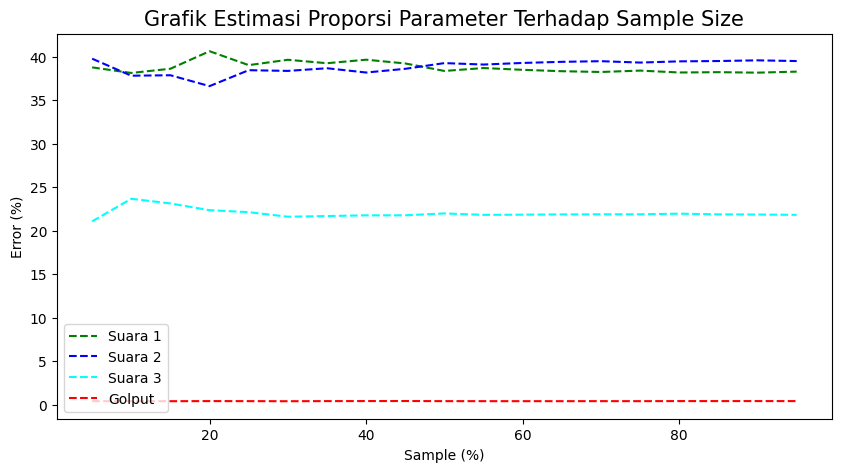

In [53]:
# grafik estimasi parameter terhdaap sample size
import matplotlib.pyplot as plt
import seaborn as sns

x = estimation_parameter_data["Sample (%)"]

plt.figure(figsize=(10, 5))
plt.plot(x, estimation_parameter_data["suara_1"], label = "Suara 1", color = "green", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_2"], label = "Suara 2", color = "blue", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["suara_3"], label = "Suara 3", color = "cyan", linestyle = "dashed")
plt.plot(x, estimation_parameter_data["golput"], label = "Golput", color = "red", linestyle = "dashed")
plt.title("Grafik Estimasi Proporsi Parameter Terhadap Sample Size", size = 15)
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()

In [54]:
# hitung eror estimasi parameter suara_1, suara_2, suara 3 dan golput 
percentage_suara_1_kabupaten = (completed_data["suara_1"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_2_kabupaten = (completed_data["suara_2"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100  
percentage_suara_3_kabupaten = (completed_data["suara_3"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100 
percentage_golput_kabupaten = (completed_data["golput"].sum() / (completed_data["suara_1"].sum() + completed_data["suara_2"].sum()  + completed_data["suara_3"].sum() + completed_data["golput"].sum())) * 100

x = estimation_parameter_data["Sample (%)"]
error_suara_1 = abs(100 * (estimation_parameter_data["suara_1"] - percentage_suara_1_kabupaten) / percentage_suara_1_kabupaten)
error_suara_2 = abs(100 * (estimation_parameter_data["suara_2"] - percentage_suara_2_kabupaten) / percentage_suara_2_kabupaten)
error_suara_3 = abs(100 * (estimation_parameter_data["suara_3"] - percentage_suara_3_kabupaten) / percentage_suara_3_kabupaten)
error_golput = abs(100 * (estimation_parameter_data["golput"] - percentage_golput_kabupaten) / percentage_golput_kabupaten)

data_error = pd.DataFrame({
  "Sample (%)": x,
  "Error Suara 1": error_suara_1,
  "Error Suara 2": error_suara_2,
  "Error Suara 3": error_suara_3,
  "Error Golput": error_golput
})

data_error.to_csv('output_MCRS.csv', index = False)

print("============== Error Estimasi Proporsi Parameter ==============")
data_error

============== Error Estimasi Proporsi Parameter ==============


,Sample (%),Error Suara 1,Error Suara 2,Error Suara 3,Error Golput
0,5,1.505150,0.423610,3.352443,2.662948
1,10,0.167505,4.513633,8.534929,2.346148
2,15,1.097727,4.380057,6.087239,2.879025
3,20,6.367283,7.534893,2.532431,0.090364
4,25,2.181001,2.913719,1.497160,1.324588
...,...,...,...,...,...
14,75,0.537839,0.702513,0.370038,1.843828
15,80,0.031901,0.351550,0.695434,0.064146
16,85,0.067390,0.257090,0.351859,0.156008
17,90,0.078928,0.055814,0.236562,0.152021


<Figure size 1000x500 with 0 Axes>

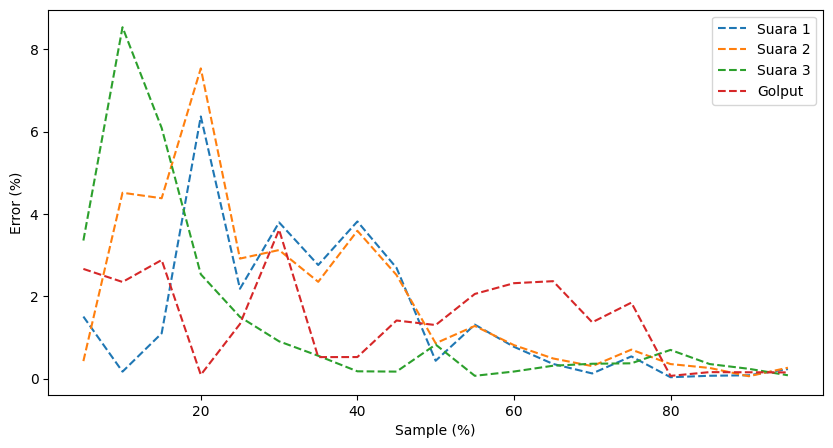

In [55]:
# display estimation persentase error of proportion
fig = plt.figure(figsize = (10, 5))

x = estimation_parameter_data["Sample (%)"]

estimation_parameter_data["error_suara_1"] = error_suara_1
estimation_parameter_data["error_suara_2"] = error_suara_2
estimation_parameter_data["error_suara_3"] = error_suara_3
estimation_parameter_data["error_golput"] = error_golput

# graph error
plt.figure(figsize = (10, 5))
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_1"], label = "Suara 1", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_2"], label = "Suara 2", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_suara_3"], label = "Suara 3", linestyle = "dashed")
plt.plot(estimation_parameter_data["Sample (%)"], estimation_parameter_data["error_golput"], label = "Golput", linestyle = "dashed")
plt.xlabel("Sample (%)")
plt.ylabel("Error (%)")
plt.legend()
plt.show()